In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [19]:
titanic_df=pd.read_csv("Data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

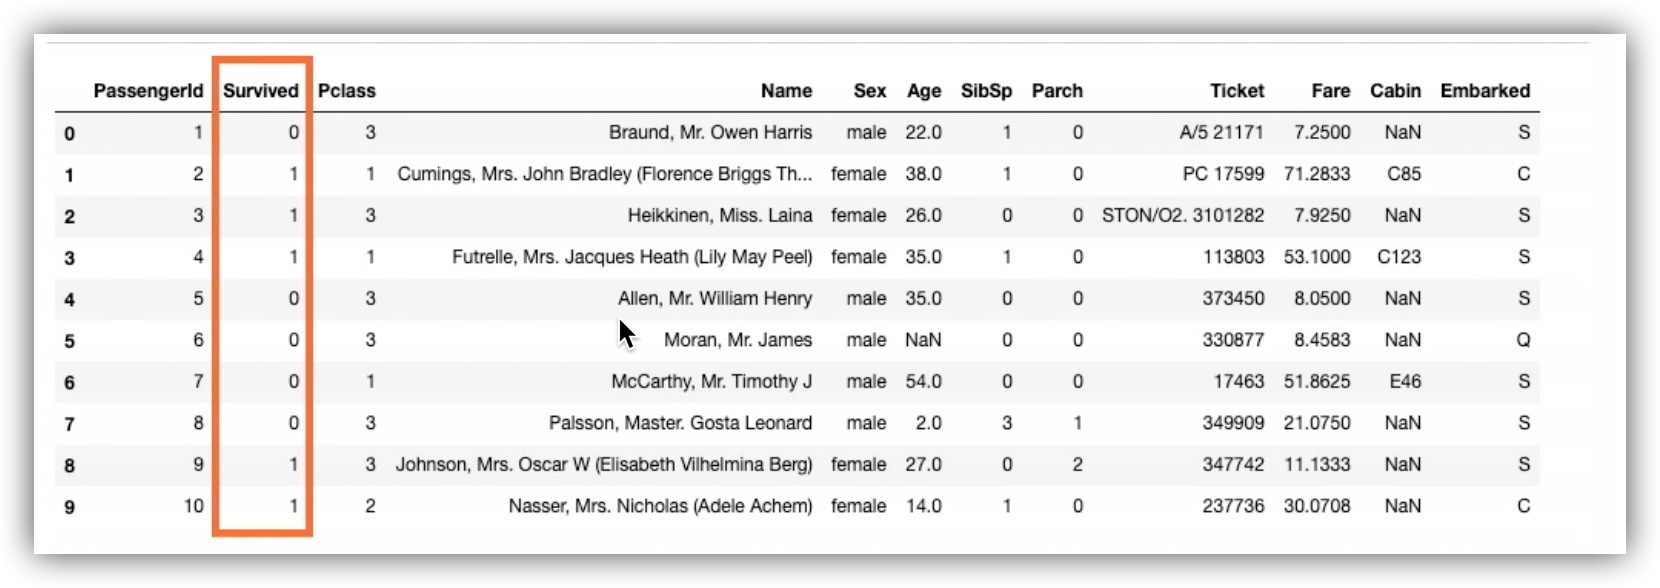

In [9]:
'''
This dataset contains various details about passengers for about 800 of the passengers on the Titanic, 
and it contains a column which tells you whether the passenger survived the Titanic disaster or not. 
Zero means the passenger did not survive.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-13-10.jpg')


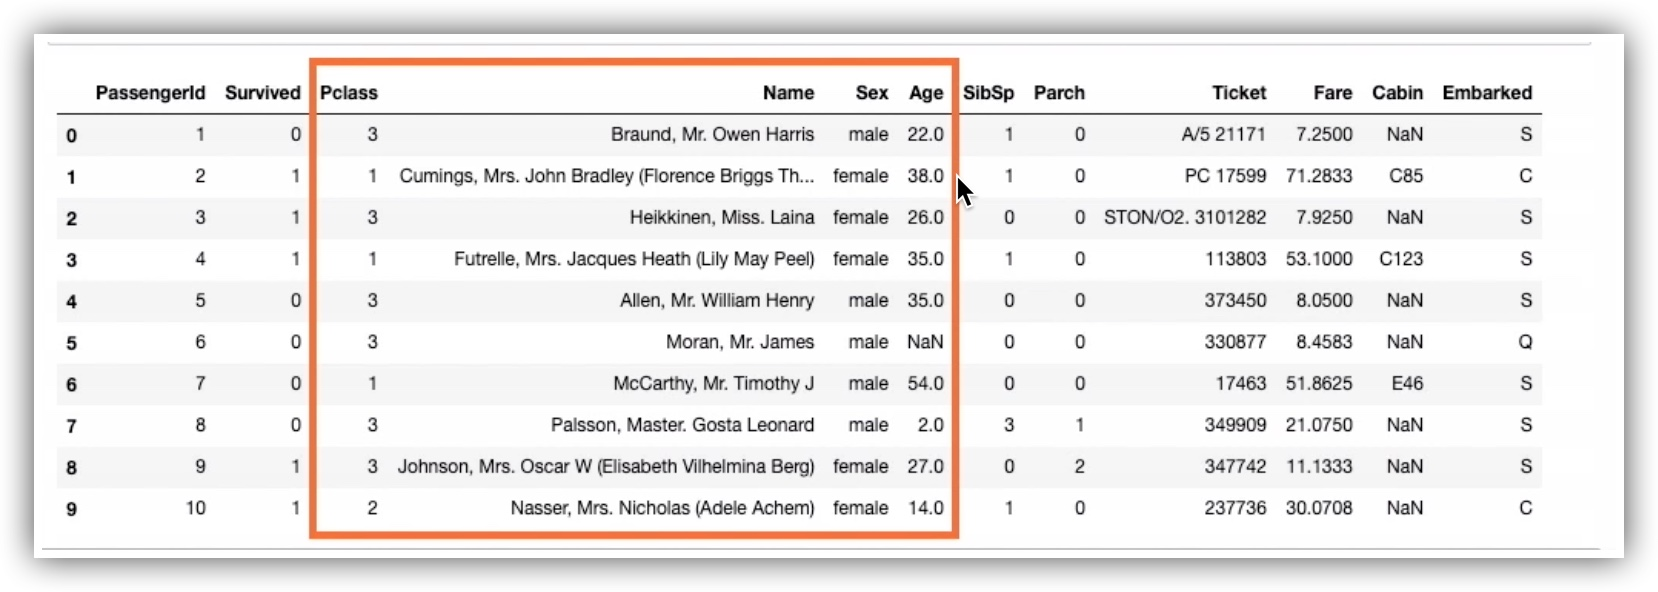

In [10]:
'''
This dataset contains various details about passengers for about 800 of the passengers on the Titanic, 
and it contains a column which tells you whether the passenger survived the Titanic disaster or not. 
Zero means the passenger did not survive.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-17-38.jpg')

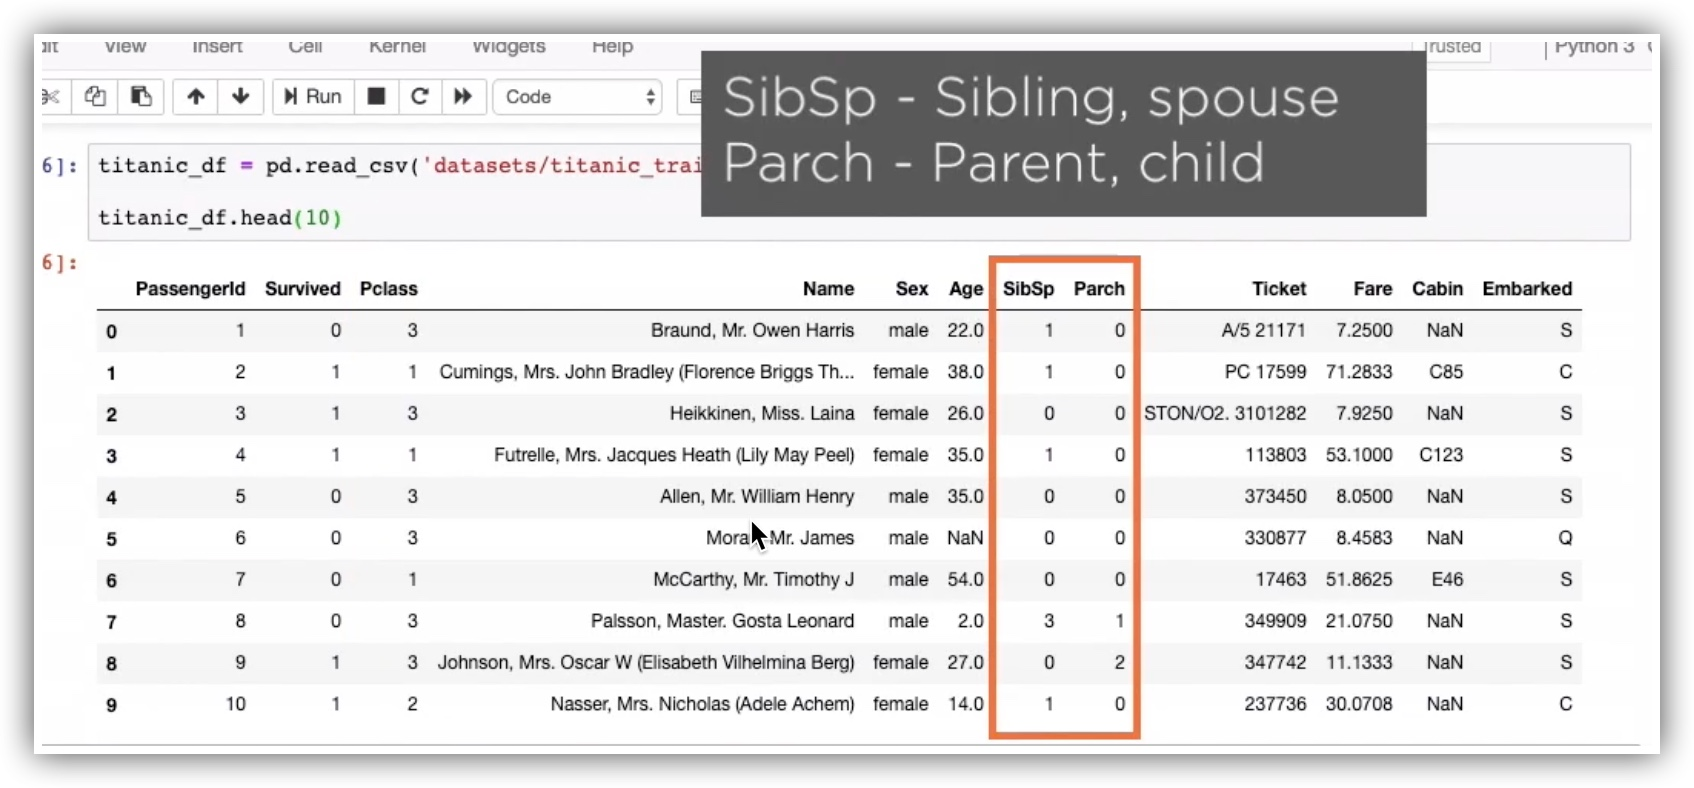

In [12]:
'''
The two columns that have slightly confusing names here stand for siblings, spouse, and parent, child. 
The sibling, spouse column tells you how many siblings a particular passenger traveled with. 
The Parch column indicates whether a passenger's parent or child was present on the Titanic with them. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-18-35.jpg')

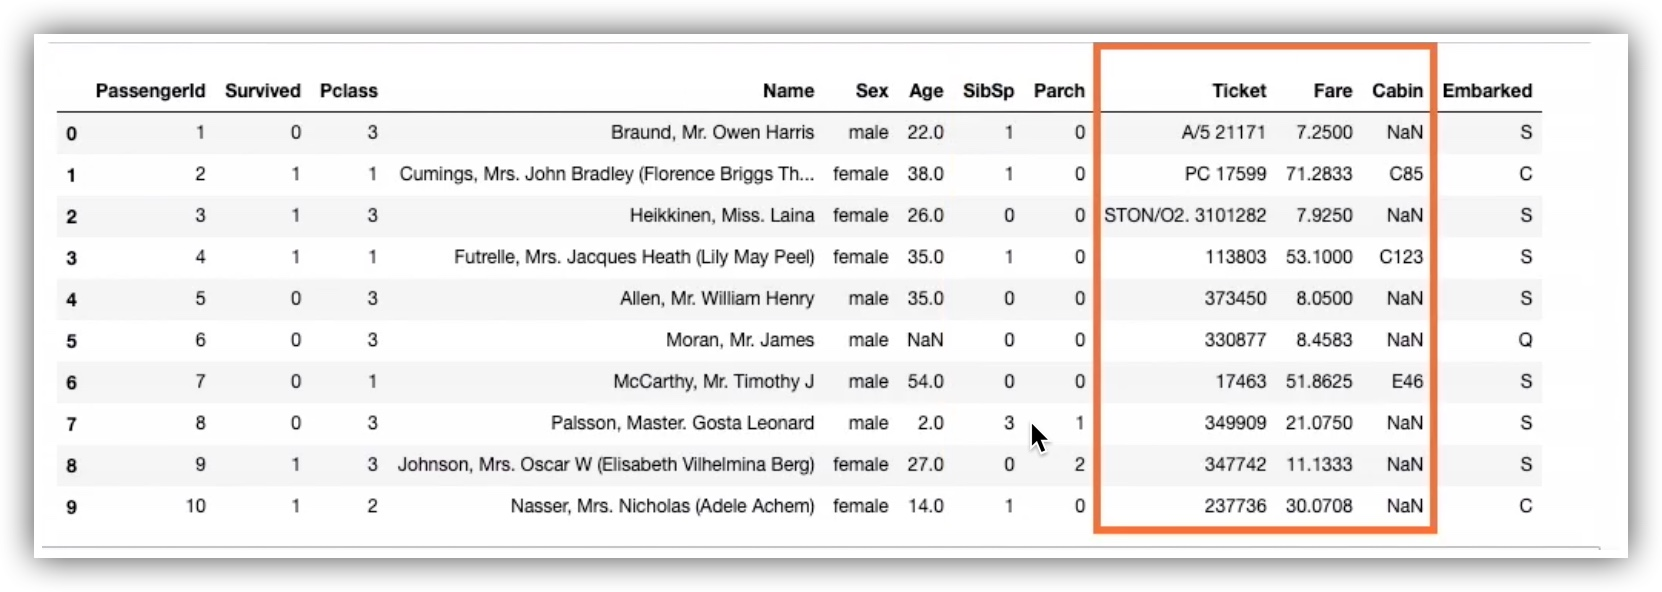

In [13]:
'''
There are other interesting details here as well. The ticket number for a particular passenger, 
the fare that passenger paid, and the cabin number. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-21-25.jpg')

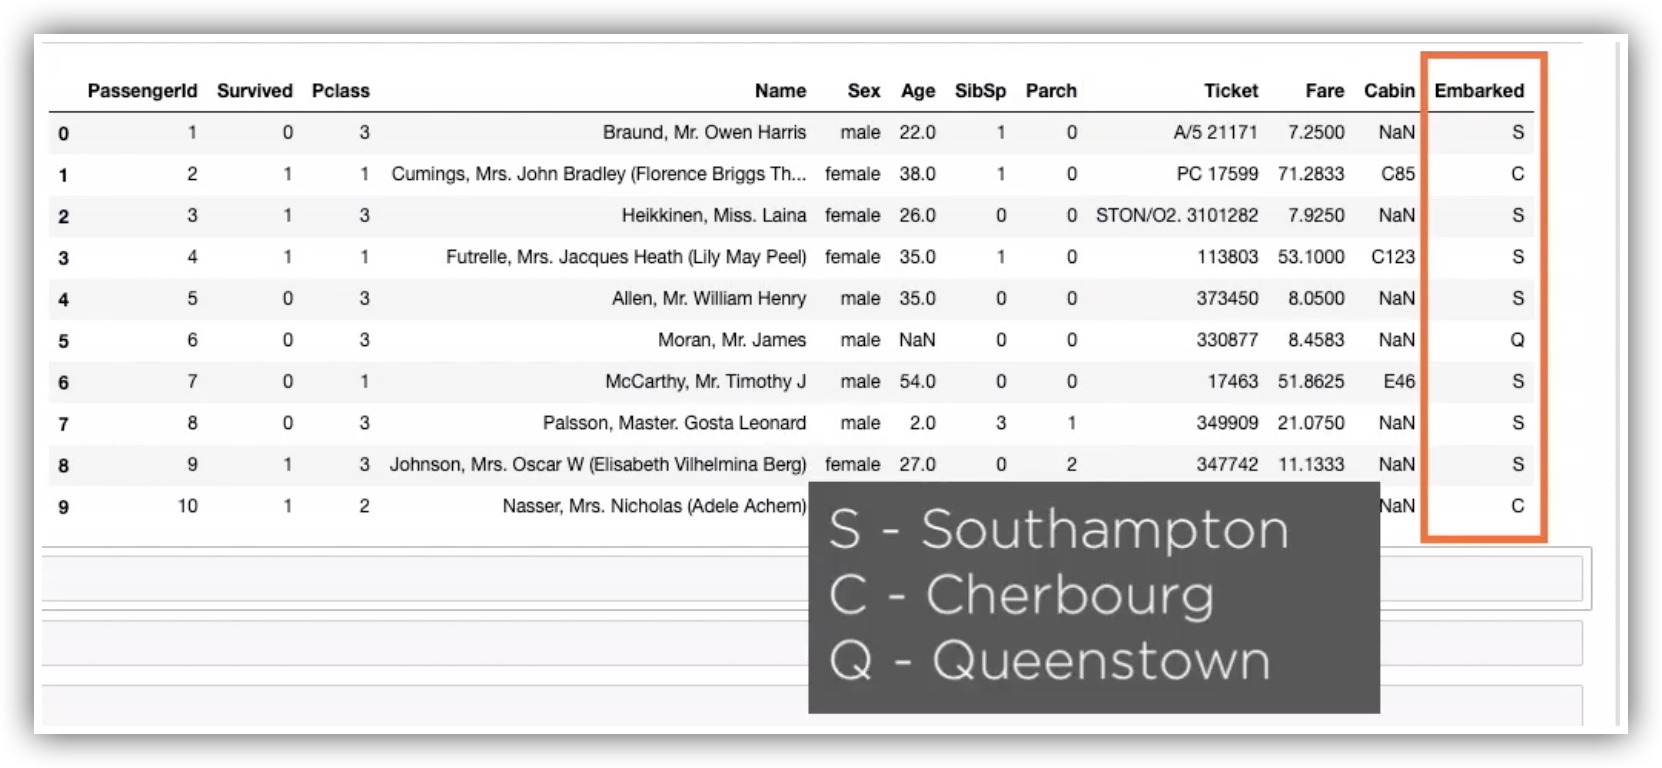

In [14]:
'''
we have the last column here, Embarked. This indicates the port at which the passenger got onto the Titanic. 
This column value is S if the passenger got on at Southampton, C if the passenger got on at Cherbourg, 
and Q for Queenstown. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-23-14.jpg')

In [16]:
'''
Let's take a look at the shape of the dataset to see how many records and features we are working with. 
There are a total of 891 records, 891 passenger details. And there are 12 columns of information.

One of these is, of course, our labels column, whether the passenger survived or not.
'''
titanic_df.shape

(891, 12)

In [20]:
'''
some of these columns contain irrelevant information, information that may no bearing on whether the passenger 
survived the sinking of the Titanic. 

Examples of these are the passenger ID, the name of the passenger, the number on the passenger's ticket, 
and the cabin number. I'm going to go ahead and drop these columns from our dataset. 

We'll perform the drop in place so that the titanic_df dataframe itself is updated. 
'''
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
'''
Well, we do need information on whether the passenger survived or not. 
That's what we'll use to train our ML model

The class in which the passenger was traveling, whether it was first, second, or third, because you 
might have heard that first class passengers were given preference on lifeboats. 

The sex of the passenger, that's relevant as well, women and children first, after all.

The age of the passenger, maybe younger passengers are more likely to survive.

And in this manner, you can make a case for each of these columns being a viable feature to train our dataset. 
'''

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:

'''
For each column in our dataset, we'll check to see whether any of the column values are equal to null. 
The axis equal to one parameter will perform this check for each column in our dataframe. 

And we'll display a count of how many records have missing or null values. 
As you can see, there are a number of records with missing fields here. 
'''
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [23]:
'''
The classification models that we build won't really know how to deal with these missing values. 
Let's go ahead and clean our data and drop all records with missing field information from our dataset. 

The dropna function on our dataframe will drop all records which have even one field value missing. 
And if you take a look at our resulting dataframes shape, you'll see that we now have fewer records to work with.
We have 712 records in our dataset. 
'''

titanic_df=titanic_df.dropna()
titanic_df.shape

(712, 8)

In [25]:
'''
When you run the missing fields check once again, you'll find that all counts are 0. 
'''
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
'''
f you want a quick statistical overview of all of the numeric data in your dataset, 
you can call the describe function on your dataframe. 

This gives us statistical measures, such as mean standard deviation, min, max, and quartiles 
for all numeric values. 

You can see on top here that we have a count of the number of records. There are 712 records in our dataset.

Notice the mean of the survived column. 
Remember the survived column is composed of just 0's and 1's, 0 if the person did not survive the sinking, 
1 if he or she did. 
An average value of around 0.4 indicates that only 40% of the passengers in our dataset survived the sinking.

Here is the average age of the passengers. It's around 30, so the passengers were fairly young, 
and the average fare paid, around 35. 
'''
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200
